<h2 align="center">AtliQ Hotels Data Analysis Project<h2>

**Business Problem**
*Atliq Grands is experiencing uneven occupancy across cities and hotel categories, along with a noticeable performance gap between weekdays and weekends. The business manager needs data-driven insights to identify underperforming segments and take corrective actions to improve overall occupancy and revenue.*

In [2]:
import pandas as pd

***
### ==> 1. Data Import and Data Exploration
***

### Datasets
We have 5 csv file 

   - dim_date.csv  
   - dim_hotels.csv
   - dim_rooms.csv
   - fact_aggregated_bookings
   - fact_bookings.csv

**Read bookings data in a datagrame**

In [3]:
df_bookings = pd.read_csv('datasets/fact_bookings.csv')

**Explore bookings data**

In [4]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [5]:
df_bookings.shape

(134590, 12)

In [6]:
df_bookings.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [7]:
df_bookings.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [8]:
df_bookings.booking_platform.value_counts()

booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64

<Axes: xlabel='booking_platform'>

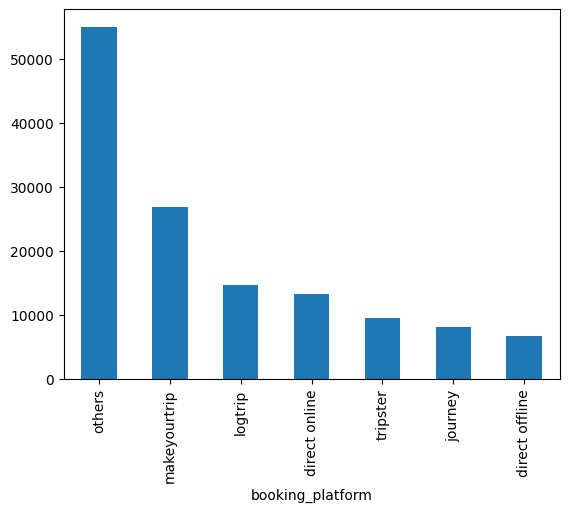

In [9]:
df_bookings.booking_platform.value_counts().plot(kind="bar")

In [10]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


**Read rest of the files**

In [11]:
df_date = pd.read_csv('datasets/dim_date.csv')
df_hotels = pd.read_csv('datasets/dim_hotels.csv')
df_rooms = pd.read_csv('datasets/dim_rooms.csv')
df_agg_bookings = pd.read_csv('datasets/fact_aggregated_bookings.csv')

In [12]:
df_hotels.shape

(25, 4)

In [13]:
df_hotels.head(3)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [14]:
df_hotels.category.value_counts()

category
Luxury      16
Business     9
Name: count, dtype: int64

<Axes: xlabel='city'>

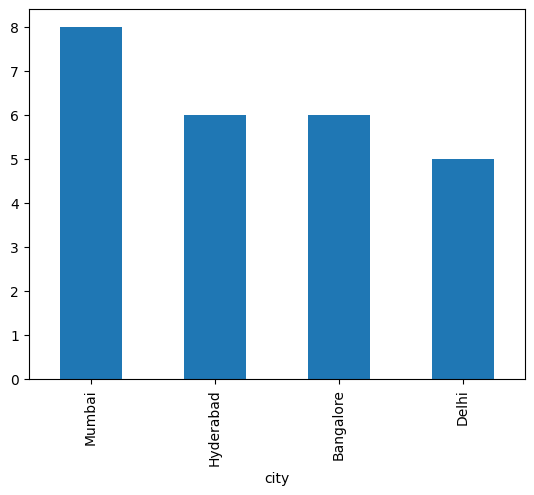

In [15]:
df_hotels.city.value_counts().plot(kind="bar")

***
**Explore aggregate bookings**
***

In [16]:
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0


**Objective:
Identify the number of distinct properties represented in the bookings data to validate coverage across the hotel portfolio.**

In [17]:
df_agg_bookings.property_id.unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560])

**Objective:
Analyze booking volume at the property level to understand demand distribution across hotels.**

In [18]:
df_agg_bookings.groupby('property_id')['successful_bookings'].sum()

property_id
16558    3153
16559    7338
16560    4693
16561    4418
16562    4820
16563    7211
17558    5053
17559    6142
17560    6013
17561    5183
17562    3424
17563    6337
17564    3982
18558    4475
18559    5256
18560    6638
18561    6458
18562    7333
18563    4737
19558    4400
19559    4729
19560    6079
19561    5736
19562    5812
19563    5413
Name: successful_bookings, dtype: int64

**Objective:
Detect days where bookings exceed available capacity to identify potential data quality issues or operational constraints.**

In [19]:
df_agg_bookings[df_agg_bookings.successful_bookings > df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


**Objective:
Identify high-capacity properties to understand their role in overall occupancy and revenue contribution.**

In [20]:
max_capacity = df_agg_bookings.capacity.max()
df_agg_bookings[df_agg_bookings.capacity == max_capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
27,17558,1-May-22,RT2,38,50.0
128,17558,2-May-22,RT2,27,50.0
229,17558,3-May-22,RT2,26,50.0
328,17558,4-May-22,RT2,27,50.0
428,17558,5-May-22,RT2,29,50.0
...,...,...,...,...,...
8728,17558,27-Jul-22,RT2,22,50.0
8828,17558,28-Jul-22,RT2,21,50.0
8928,17558,29-Jul-22,RT2,23,50.0
9028,17558,30-Jul-22,RT2,32,50.0


***
### ==> 2. Data Cleaning
***

In [21]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


**(1) Clean invalid guests**

In [22]:
df_bookings[df_bookings.no_guests<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-22,20-07-22,22-07-22,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


As you can see above, number of guests having less than zero value represents data error. We can ignore these records.

In [23]:
df_bookings = df_bookings[df_bookings.no_guests>0]

In [24]:
df_bookings.shape

(134578, 12)

**(2) Outlier removal in revenue generated**

In [25]:
df_bookings.revenue_generated.min(), df_bookings.revenue_generated.max()

(np.int64(6500), np.int64(28560000))

In [26]:
df_bookings.revenue_generated.mean(), df_bookings.revenue_generated.median()

(np.float64(15378.036937686695), np.float64(13500.0))

In [27]:
avg, std = df_bookings.revenue_generated.mean(), df_bookings.revenue_generated.std()

In [28]:
higher_limit = avg + 3*std
higher_limit

np.float64(294498.50173207896)

In [29]:
lower_limit = avg - 3*std
lower_limit

np.float64(-263742.4278567056)

In [30]:
df_bookings[df_bookings.revenue_generated<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [31]:
df_bookings[df_bookings.revenue_generated>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-22,1/5/2022,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-22,28-07-22,29-07-22,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


In [32]:
df_bookings = df_bookings[df_bookings.revenue_generated<=higher_limit]
df_bookings.shape

(134573, 12)

In [33]:
df_bookings.revenue_realized.describe()

count    134573.000000
mean      12695.983585
std        6927.791692
min        2600.000000
25%        7600.000000
50%       11700.000000
75%       15300.000000
max       45220.000000
Name: revenue_realized, dtype: float64

In [34]:
higher_limit = df_bookings.revenue_realized.mean() + 3*df_bookings.revenue_realized.std()
higher_limit

np.float64(33479.358661845814)

In [35]:
df_bookings[df_bookings.revenue_realized>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,27-04-22,1/5/2022,7/5/2022,4.0,RT4,others,NaN,Checked Out,38760,38760
139,May012216559RT43,16559,1/5/2022,1/5/2022,2/5/2022,6.0,RT4,tripster,3.0,Checked Out,45220,45220
143,May012216559RT47,16559,28-04-22,1/5/2022,3/5/2022,3.0,RT4,others,5.0,Checked Out,35530,35530
149,May012216559RT413,16559,24-04-22,1/5/2022,7/5/2022,5.0,RT4,logtrip,NaN,Checked Out,41990,41990
222,May012216560RT45,16560,30-04-22,1/5/2022,3/5/2022,5.0,RT4,others,3.0,Checked Out,34580,34580
...,...,...,...,...,...,...,...,...,...,...,...,...
134328,Jul312219560RT49,19560,31-07-22,31-07-22,2/8/2022,6.0,RT4,direct online,5.0,Checked Out,39900,39900
134331,Jul312219560RT412,19560,31-07-22,31-07-22,1/8/2022,6.0,RT4,others,2.0,Checked Out,39900,39900
134467,Jul312219562RT45,19562,28-07-22,31-07-22,1/8/2022,6.0,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134474,Jul312219562RT412,19562,25-07-22,31-07-22,6/8/2022,5.0,RT4,direct offline,5.0,Checked Out,37050,37050


One observation we can have in above dataframe is that all rooms are RT4 which means presidential suit. Now since RT4 is a luxurious room it is likely their rent will be higher. To make a fair analysis, we need to do data analysis only on RT4 room types

In [36]:
df_bookings[df_bookings.room_category=="RT4"].revenue_realized.describe()

count    16071.000000
mean     23439.308444
std       9048.599076
min       7600.000000
25%      19000.000000
50%      26600.000000
75%      32300.000000
max      45220.000000
Name: revenue_realized, dtype: float64

Here higher limit comes to be 50583 and in our dataframe above we can see that max value for revenue realized is 45220. Hence we can conclude that there is no outlier and we don't need to do any data cleaning on this particular column

In [37]:
df_bookings[df_bookings.booking_id=="May012216558RT213"]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [38]:
df_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77897
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

Total values in our dataframe is 134576. Out of that 77899 rows has null rating. Since there are many rows with null rating, we should not filter these values. Also we should not replace this rating with a median or mean rating etc 

**In aggregate bookings replacing columns that have null value with median value**

In [39]:
df_agg_bookings.isnull().sum()


property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

In [40]:
df_agg_bookings['capacity'].describe()

count    9198.000000
mean       25.280496
std        11.442080
min         3.000000
25%        18.000000
50%        25.000000
75%        34.000000
max        50.000000
Name: capacity, dtype: float64

In [41]:
capacity_median = df_agg_bookings['capacity'].median()
capacity_median

np.float64(25.0)

In [42]:
df_agg_bookings['capacity'] = df_agg_bookings['capacity'].fillna(capacity_median)

In [43]:
df_agg_bookings['capacity'].isnull().sum()

np.int64(0)

**Objective:
Filter and inspect anomalous booking records where successful bookings exceed capacity to ensure data accuracy before analysis.**

In [44]:
# write your code here
df_agg_bookings[df_agg_bookings.successful_bookings > df_agg_bookings.capacity]
df_agg_bookings = df_agg_bookings[df_agg_bookings.successful_bookings <= df_agg_bookings.capacity]
df_agg_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
4,16558,1-May-22,RT1,18,19.0
5,17560,1-May-22,RT1,28,40.0
...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0
9196,16559,31-Jul-22,RT4,13,18.0
9197,17558,31-Jul-22,RT4,3,6.0
9198,19563,31-Jul-22,RT4,3,6.0


***
### ==> 3. Data Transformation
***

**Objective:
Derive occupancy percentage as a key performance metric to evaluate utilization across properties, cities, and room categories.**

In [45]:
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0


In [46]:
df_agg_bookings['occ_pct'] = df_agg_bookings.apply(lambda row: row['successful_bookings']/row['capacity'], axis=1)

You can use following approach to get rid of SettingWithCopyWarning

In [47]:
new_col = df_agg_bookings.apply(lambda row: row['successful_bookings']/row['capacity'], axis=1)
df_agg_bookings = df_agg_bookings.assign(occ_pct=new_col.values)
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,0.833333
1,19562,1-May-22,RT1,28,30.0,0.933333
2,19563,1-May-22,RT1,23,30.0,0.766667


Convert it to a percentage value

In [48]:
df_agg_bookings['occ_pct'] = df_agg_bookings['occ_pct'].apply(lambda x: round(x*100, 2))
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67


In [49]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100


In [50]:
df_agg_bookings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9194 entries, 0 to 9199
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_id          9194 non-null   int64  
 1   check_in_date        9194 non-null   object 
 2   room_category        9194 non-null   object 
 3   successful_bookings  9194 non-null   int64  
 4   capacity             9194 non-null   float64
 5   occ_pct              9194 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 502.8+ KB


There are various types of data transformations that you may have to perform based on the need. Few examples of data transformations are,

1. Creating new columns
1. Normalization
1. Merging data
1. Aggregation

***
### ==> 4. Insights Generation
***

**Objective:
Compare average occupancy across room categories to identify demand patterns and underperforming room types.**

In [51]:
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67


In [52]:
df_agg_bookings.groupby("room_category")["occ_pct"].mean()

room_category
RT1    57.889643
RT2    58.009756
RT3    58.028213
RT4    59.277925
Name: occ_pct, dtype: float64

In [53]:
df = pd.merge(df_agg_bookings, df_rooms, left_on="room_category", right_on="room_id")
df.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,RT1,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,RT1,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,RT1,Standard
3,16558,1-May-22,RT1,18,19.0,94.74,RT1,Standard


In [54]:
df.drop("room_id",axis=1, inplace=True)
df.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,Standard
3,16558,1-May-22,RT1,18,19.0,94.74,Standard


In [100]:
room_occ = df.groupby("room_class")["occ_pct"].mean()

In [101]:
room_occ.to_csv("outputs/avg_occupancy_by_room_class.csv", index=False)

In [56]:
df[df.room_class=="Standard"].occ_pct.mean()

np.float64(57.88964285714285)

**Objective:
Evaluate city-wise occupancy performance to pinpoint locations with persistent utilization challenges.**

In [57]:
df_hotels.head(3)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [58]:
df = pd.merge(df, df_hotels, on="property_id")
df.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city
0,16559,1-May-22,RT1,25,30.0,83.33,Standard,Atliq Exotica,Luxury,Mumbai
1,19562,1-May-22,RT1,28,30.0,93.33,Standard,Atliq Bay,Luxury,Bangalore
2,19563,1-May-22,RT1,23,30.0,76.67,Standard,Atliq Palace,Business,Bangalore


In [102]:
city_occ = df.groupby("city")["occ_pct"].mean()

In [103]:
city_occ.to_csv("outputs/avg_occupancy_by_city.csv", index=False)

In [60]:
df['check_in_date'] = pd.to_datetime(df['check_in_date'])

C:\Users\Aishw\AppData\Local\Temp\ipykernel_48096\511652078.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['check_in_date'] = pd.to_datetime(df['check_in_date'])


In [61]:
df['day_type'] = df['check_in_date'].dt.dayofweek.apply(
    lambda x: 'Weekend' if x >= 5 else 'Weekday'
)

In [62]:
city_day_occ = (
    df.groupby(['city', 'day_type'])['occ_pct']
      .mean()
      .reset_index()
)

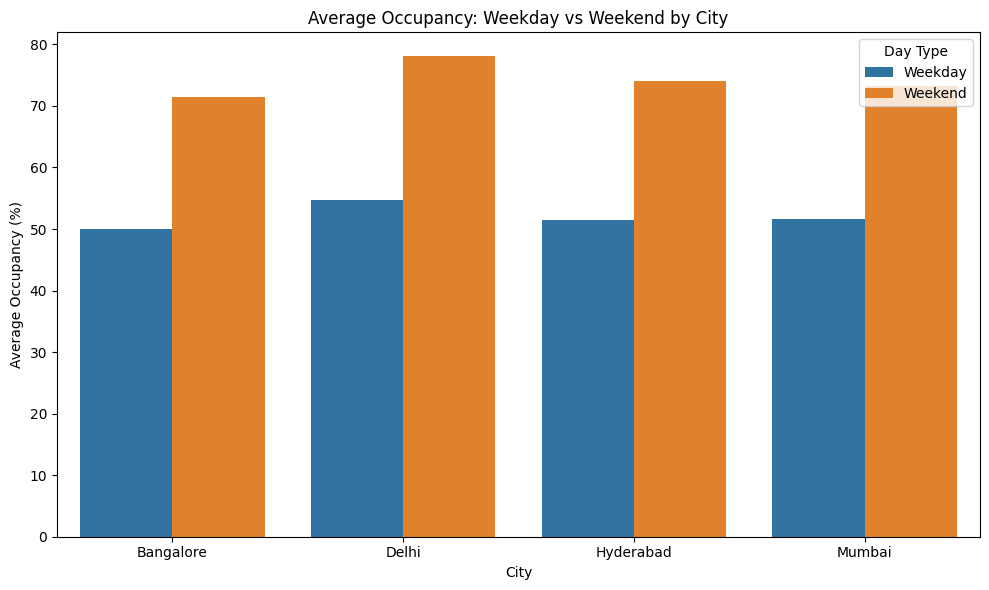

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(
    data=city_day_occ,
    x='city',
    y='occ_pct',
    hue='day_type'
)

plt.title('Average Occupancy: Weekday vs Weekend by City')
plt.xlabel('City')
plt.ylabel('Average Occupancy (%)')
plt.legend(title='Day Type')
plt.tight_layout()

# Save the figure
plt.savefig('outputs/weekday_vs_weekend_occupancy_by_city.png', dpi=300, bbox_inches='tight')

plt.show()


**Objective:**
*Identify properties with high capacity but low occupancy to uncover underutilized assets and prioritize operational interventions.*

In [64]:
property_util = (
    df.groupby(['property_id', 'property_name', 'city'])[['capacity', 'occ_pct']]
      .mean()
      .reset_index()
)

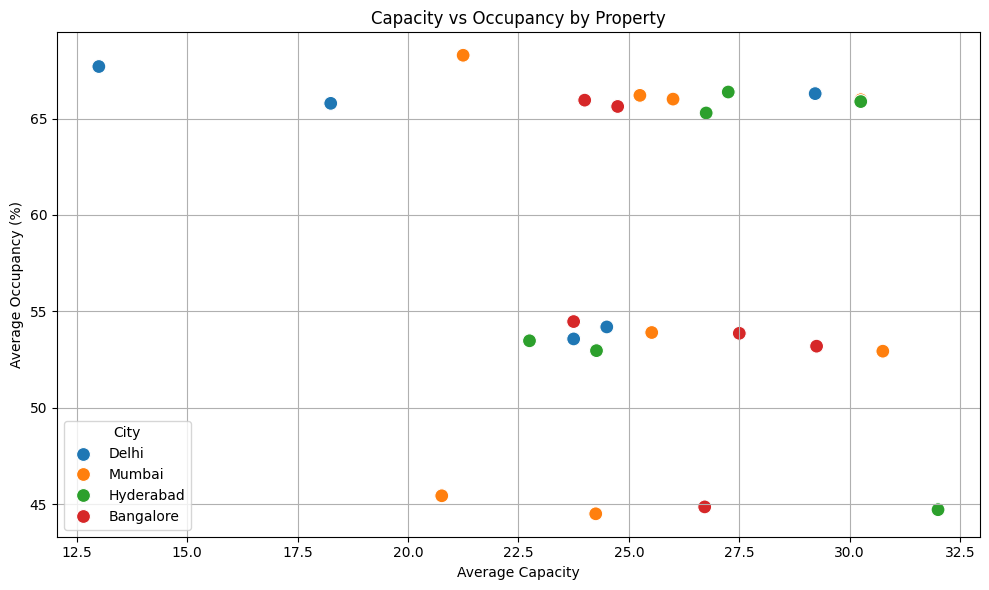

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=property_util,
    x='capacity',
    y='occ_pct',
    hue='city',
    s=100
)

plt.title('Capacity vs Occupancy by Property')
plt.xlabel('Average Capacity')
plt.ylabel('Average Occupancy (%)')
plt.legend(title='City')
plt.grid(True)
plt.tight_layout()
# Save the figure
plt.savefig('outputs/high_capacity_vs_low_occupancy.png', dpi=300, bbox_inches='tight')
plt.show()


*Top-left → Low capacity, high occupancy (healthy utilization)*

*Bottom-right → High capacity, low occupancy ⚠️ (problem area)*

*Clusters by city → Shows whether the issue is city-specific*

In [66]:
underutilized = property_util[
    (property_util['capacity'] > property_util['capacity'].median()) &
    (property_util['occ_pct'] < property_util['occ_pct'].median())
]

underutilized.sort_values('occ_pct')

,property_id,property_name,city,capacity,occ_pct
14,18559,Atliq Exotica,Hyderabad,32.000000,44.718478
19,19558,Atliq Grands,Bangalore,26.716621,44.863787
8,17560,Atliq City,Mumbai,30.750000,52.938016
22,19561,Atliq Blu,Bangalore,29.250000,53.197799
24,19563,Atliq Palace,Bangalore,27.500000,53.865136
6,17558,Atliq Grands,Mumbai,25.517711,53.906267


In [104]:
underutilized.to_csv("outputs/underutilized_properties.csv", index=False)

*Several high-capacity properties are operating below 55% occupancy, indicating inefficient asset utilization. Bangalore and Mumbai contribute disproportionately to this gap, suggesting that the issue is city-driven rather than property-specific..*

**Objective:**
Analyze occupancy performance across room categories and cities to identify city-specific demand patterns and underperforming room types

In [67]:
city_room_occ = (
    df.groupby(['city', 'room_category'])['occ_pct']
      .mean()
      .reset_index()
)

In [68]:
heatmap_data = city_room_occ.pivot(
    index='city',
    columns='room_category',
    values='occ_pct'
)


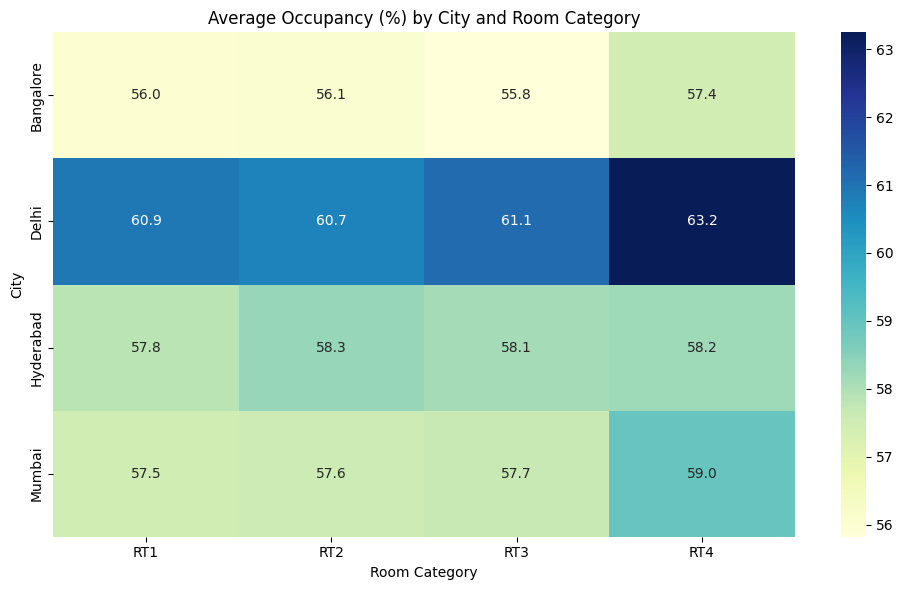

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".1f",
    cmap='YlGnBu'
)

plt.title('Average Occupancy (%) by City and Room Category')
plt.xlabel('Room Category')
plt.ylabel('City')
plt.tight_layout()
plt.savefig(
    'outputs/occupancy_heatmap_city_room_category.png',
    dpi=300,
    bbox_inches='tight'
)
plt.show()


**Insight:**
Occupancy performance varies significantly by city but remains relatively consistent across room categories within the same city. Delhi demonstrates strong demand across all room types, while Bangalore underperforms consistently, indicating city-level challenges rather than room-category mismatches.

**Business Implication:**
Occupancy issues are driven more by location-specific factors such as demand patterns, pricing sensitivity, or competitive intensity, rather than room inventory mix.

**Recommended Actions:**

Apply city-specific pricing and promotion strategies instead of uniform portfolio-wide offers.

Protect pricing for high-performing combinations (e.g., RT4 in Delhi) to maximize revenue.

Focus demand-generation initiatives in Bangalore rather than altering room-category supply.

**Objective:
Assess occupancy differences between weekdays and weekends to understand demand fluctuations and identify weekday performance gaps.**

In [70]:
df_date.head(3)

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday


In [71]:
df_date['date'] = pd.to_datetime(df_date['date'])

C:\Users\Aishw\AppData\Local\Temp\ipykernel_48096\2122144948.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_date['date'] = pd.to_datetime(df_date['date'])


In [72]:
df = pd.merge(df, df_date, left_on="check_in_date", right_on="date")
df.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,day_type_x,date,mmm yy,week no,day_type_y
0,16559,2022-05-01,RT1,25,30.0,83.33,Standard,Atliq Exotica,Luxury,Mumbai,Weekend,2022-05-01,May 22,W 19,weekend
1,19562,2022-05-01,RT1,28,30.0,93.33,Standard,Atliq Bay,Luxury,Bangalore,Weekend,2022-05-01,May 22,W 19,weekend
2,19563,2022-05-01,RT1,23,30.0,76.67,Standard,Atliq Palace,Business,Bangalore,Weekend,2022-05-01,May 22,W 19,weekend


In [106]:
day_type_occ_pct = df.groupby("day_type_y")["occ_pct"].mean().round(2)

In [107]:
day_type_occ_pct.to_csv("outputs/occ_pct_by_day_type.csv", index=False)

**Objective:
Analyze city-wise occupancy during June to uncover seasonal or month-specific performance variations.**

In [74]:
df_june_22 = df[df["mmm yy"]=="Jun 22"]
df_june_22.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,day_type_x,date,mmm yy,week no,day_type_y
3098,16559,2022-06-01,RT1,14,30.0,46.67,Standard,Atliq Exotica,Luxury,Mumbai,Weekday,2022-06-01,Jun 22,W 23,weekeday
3099,18560,2022-06-01,RT1,18,30.0,60.00,Standard,Atliq City,Business,Hyderabad,Weekday,2022-06-01,Jun 22,W 23,weekeday
3100,19562,2022-06-01,RT1,18,30.0,60.00,Standard,Atliq Bay,Luxury,Bangalore,Weekday,2022-06-01,Jun 22,W 23,weekeday
3101,19563,2022-06-01,RT1,14,30.0,46.67,Standard,Atliq Palace,Business,Bangalore,Weekday,2022-06-01,Jun 22,W 23,weekeday


In [75]:
df_june_22.groupby('city')['occ_pct'].mean().round(2).sort_values(ascending=False)

city
Delhi        61.46
Mumbai       57.79
Hyderabad    57.69
Bangalore    55.85
Name: occ_pct, dtype: float64

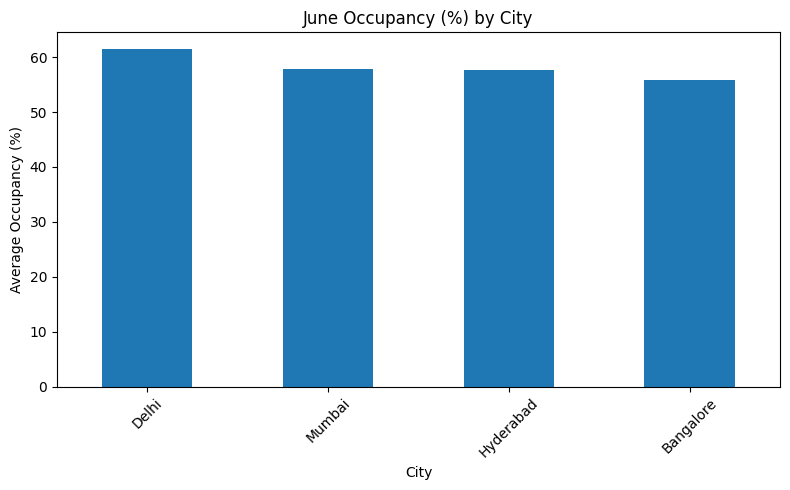

In [97]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

df_june_22.groupby('city')['occ_pct'] \
    .mean() \
    .round(2) \
    .sort_values(ascending=False) \
    .plot(kind="bar")

plt.title("June Occupancy (%) by City")
plt.xlabel("City")
plt.ylabel("Average Occupancy (%)")
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig("outputs/june_occupancy_by_city.png", dpi=300, bbox_inches="tight")

plt.show()


**Objective:
Incorporate newly received August data to extend the analysis timeline and maintain up-to-date insights.**

In [77]:
df_august = pd.read_csv("datasets/new_data_august.csv")
df_august.head(3)

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67


In [78]:
df_august.columns

Index(['property_id', 'property_name', 'category', 'city', 'room_category',
       'room_class', 'check_in_date', 'mmm yy', 'week no', 'day_type',
       'successful_bookings', 'capacity', 'occ%'],
      dtype='object')

In [79]:
df.columns

Index(['property_id', 'check_in_date', 'room_category', 'successful_bookings',
       'capacity', 'occ_pct', 'room_class', 'property_name', 'category',
       'city', 'day_type_x', 'date', 'mmm yy', 'week no', 'day_type_y'],
      dtype='object')

In [80]:
df_august.shape

(7, 13)

In [81]:
df.shape

(9194, 15)

In [82]:
latest_df = pd.concat([df, df_august], ignore_index = True, axis = 0)
latest_df.tail(10)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,day_type_x,date,mmm yy,week no,day_type_y,day_type,occ%
9191,17558,2022-07-31 00:00:00,RT4,3,6.0,50.0,Presidential,Atliq Grands,Luxury,Mumbai,Weekend,2022-07-31,Jul 22,W 32,weekend,NaN,NaN
9192,19563,2022-07-31 00:00:00,RT4,3,6.0,50.0,Presidential,Atliq Palace,Business,Bangalore,Weekend,2022-07-31,Jul 22,W 32,weekend,NaN,NaN
9193,17561,2022-07-31 00:00:00,RT4,3,4.0,75.0,Presidential,Atliq Blu,Luxury,Mumbai,Weekend,2022-07-31,Jul 22,W 32,weekend,NaN,NaN
9194,16559,01-Aug-22,RT1,30,30.0,NaN,Standard,Atliq Exotica,Luxury,Mumbai,NaN,NaT,Aug-22,W 32,NaN,weekeday,100.00
9195,19562,01-Aug-22,RT1,21,30.0,NaN,Standard,Atliq Bay,Luxury,Bangalore,NaN,NaT,Aug-22,W 32,NaN,weekeday,70.00
9196,19563,01-Aug-22,RT1,23,30.0,NaN,Standard,Atliq Palace,Business,Bangalore,NaN,NaT,Aug-22,W 32,NaN,weekeday,76.67
9197,19558,01-Aug-22,RT1,30,40.0,NaN,Standard,Atliq Grands,Luxury,Bangalore,NaN,NaT,Aug-22,W 32,NaN,weekeday,75.00
9198,19560,01-Aug-22,RT1,20,26.0,NaN,Standard,Atliq City,Business,Bangalore,NaN,NaT,Aug-22,W 32,NaN,weekeday,76.92
9199,17561,01-Aug-22,RT1,18,26.0,NaN,Standard,Atliq Blu,Luxury,Mumbai,NaN,NaT,Aug-22,W 32,NaN,weekeday,69.23
9200,17564,01-Aug-22,RT1,10,16.0,NaN,Standard,Atliq Seasons,Business,Mumbai,NaN,NaT,Aug-22,W 32,NaN,weekeday,62.50


In [83]:
latest_df.shape

(9201, 17)

**Objective:
Analyze revenue realized across cities to identify high-performing and underperforming markets.**

In [84]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100


In [85]:
df_hotels.head(3)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [86]:
df_bookings_all = pd.merge(df_bookings, df_hotels, on="property_id")
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi


In [109]:
revenue_by_city = df_bookings_all.groupby("city")["revenue_realized"].sum()

In [110]:
revenue_by_city.to_csv("outputs/total_revenue_realized_by_city.csv", index=False)

**Objective:**
Examine the relationship between customer ratings and occupancy to assess whether service quality influences demand across cities.

In [89]:
rating_property = (
    df_bookings_all
    .groupby('property_id')['ratings_given']
    .mean()
    .reset_index()
)

In [91]:
occ_property = (
    df.groupby('property_id')['occ_pct']
    .mean()
    .reset_index()
)

In [92]:
rating_occ = pd.merge(
    rating_property,
    occ_property,
    on='property_id',
    how='inner'
)

In [93]:
rating_occ = pd.merge(
    rating_occ,
    df_hotels[['property_id', 'property_name', 'city']],
    on='property_id',
    how='left'
)


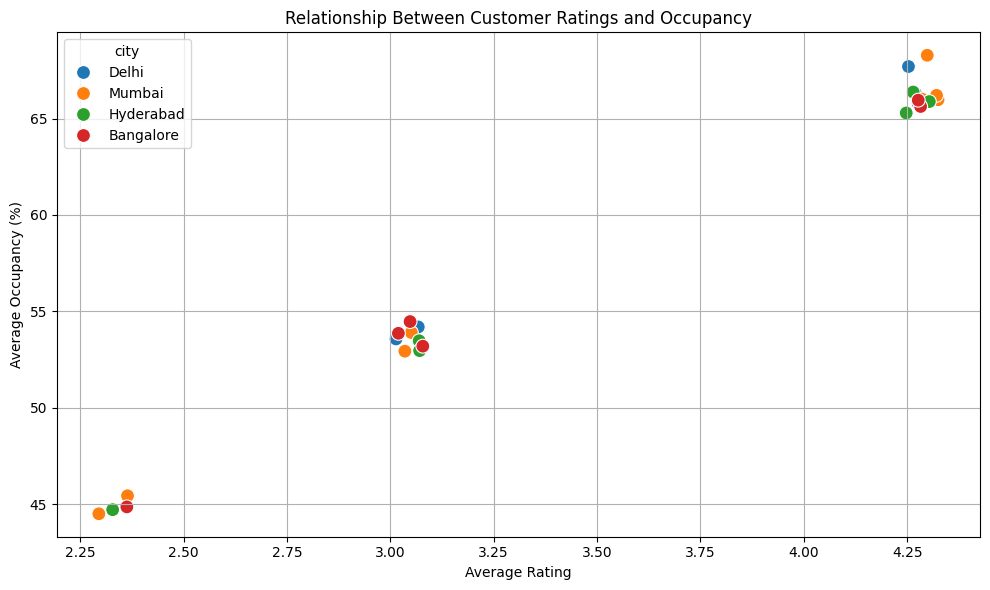

In [96]:
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=rating_occ,
    x='ratings_given',
    y='occ_pct',
    hue='city',
    s=100
)

plt.title('Relationship Between Customer Ratings and Occupancy')
plt.xlabel('Average Rating')
plt.ylabel('Average Occupancy (%)')
plt.grid(True)
plt.tight_layout()
plt.savefig(
    'outputs/average_rating_vs_average_occupancyy.png',
    dpi=300,
    bbox_inches='tight'
)
plt.show()


**Insight:**
A strong positive relationship exists between customer ratings and occupancy levels. Properties with higher average ratings consistently achieve significantly higher occupancy.

**Business Implication:**
Service quality acts as a direct demand driver. Improving ratings in underperforming properties can increase occupancy without aggressive discounting.

**Recommended Actions:**

Prioritize operational improvements in low-rated properties.

Monitor ratings as a leading indicator of occupancy performance.

Align service enhancement initiatives with revenue growth strategy.

**Objective:
Examine monthly revenue trends across cities to detect growth patterns, seasonality, or revenue declines over time.**

In [111]:
df_date.head(3)

,date,mmm yy,week no,day_type
0,2022-05-01,May 22,W 19,weekend
1,2022-05-02,May 22,W 19,weekeday
2,2022-05-03,May 22,W 19,weekeday


In [112]:
df_date["mmm yy"].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [113]:
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi


In [114]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      92 non-null     datetime64[ns]
 1   mmm yy    92 non-null     object        
 2   week no   92 non-null     object        
 3   day_type  92 non-null     object        
dtypes: datetime64[ns](1), object(3)
memory usage: 3.0+ KB


In [115]:
df_date["date"] = pd.to_datetime(df_date["date"])
df_date.head(3)

,date,mmm yy,week no,day_type
0,2022-05-01,May 22,W 19,weekend
1,2022-05-02,May 22,W 19,weekeday
2,2022-05-03,May 22,W 19,weekeday


In [116]:
df_bookings_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134573 entries, 0 to 134572
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134573 non-null  object 
 1   property_id        134573 non-null  int64  
 2   booking_date       134573 non-null  object 
 3   check_in_date      134573 non-null  object 
 4   checkout_date      134573 non-null  object 
 5   no_guests          134573 non-null  float64
 6   room_category      134573 non-null  object 
 7   booking_platform   134573 non-null  object 
 8   ratings_given      56676 non-null   float64
 9   booking_status     134573 non-null  object 
 10  revenue_generated  134573 non-null  int64  
 11  revenue_realized   134573 non-null  int64  
 12  property_name      134573 non-null  object 
 13  category           134573 non-null  object 
 14  city               134573 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 1

In [117]:
df_bookings_all['check_in_date'] = pd.to_datetime(
    df_bookings_all['check_in_date'],
    format='mixed',
    dayfirst=True
)

In [118]:
df_bookings_all = pd.merge(df_bookings_all, df_date, left_on="check_in_date", right_on="date")
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type
0,May012216558RT12,16558,30-04-22,2022-05-01,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
1,May012216558RT15,16558,27-04-22,2022-05-01,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
2,May012216558RT16,16558,1/5/2022,2022-05-01,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend


In [121]:
revenue_city = (
    df_bookings_all
    .groupby(['mmm yy', 'city'])['revenue_realized']
    .sum()
    .reset_index()
)

In [122]:
revenue_pivot = revenue_city.pivot(
    index='mmm yy',
    columns='city',
    values='revenue_realized'
)

<Figure size 1000x600 with 0 Axes>

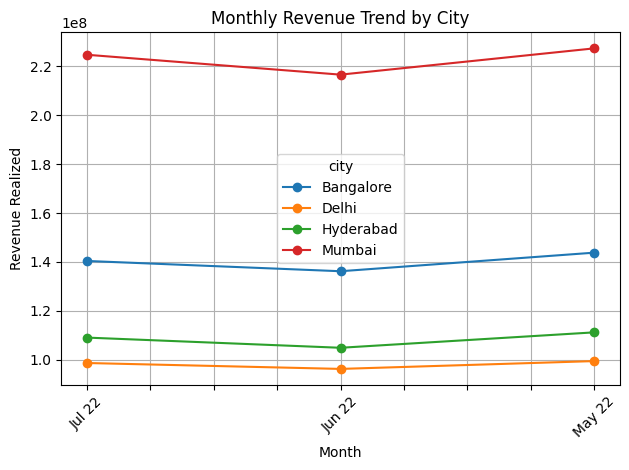

In [123]:
import matplotlib.pyplot as plt
import os

os.makedirs("outputs", exist_ok=True)

plt.figure(figsize=(10, 6))

revenue_pivot.plot(marker='o')

plt.title("Monthly Revenue Trend by City")
plt.xlabel("Month")
plt.ylabel("Revenue Realized")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.savefig("outputs/monthly_revenue_by_city.png", dpi=300, bbox_inches="tight")

plt.show()


**Objective:
Compare revenue contribution by hotel type to understand which categories drive financial performance.**

In [124]:
df_bookings_all = pd.merge(df_bookings_all,df_hotels, on = 'property_id')
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,...,property_name_x,category_x,city_x,date,mmm yy,week no,day_type,property_name_y,category_y,city_y
0,May012216558RT12,16558,30-04-22,2022-05-01,2/5/2022,2.0,RT1,others,NaN,Cancelled,...,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,2022-05-01,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,...,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,2022-05-01,3/5/2022,2.0,RT1,others,4.0,Checked Out,...,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend,Atliq Grands,Luxury,Delhi


In [127]:
revenue_category = (
    df_bookings_all
    .groupby('category_y')['revenue_realized']
    .sum()
    .sort_values()
)


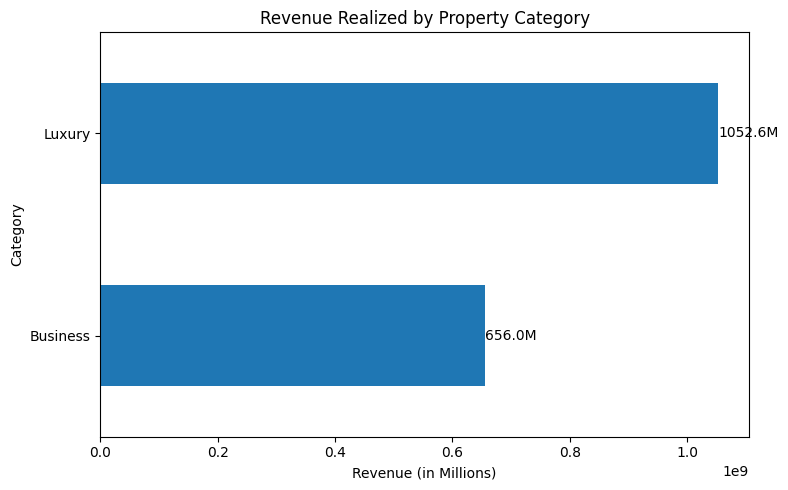

In [128]:
import matplotlib.pyplot as plt
import os

os.makedirs("outputs", exist_ok=True)

plt.figure(figsize=(8, 5))

ax = revenue_category.plot(kind='barh')

plt.title("Revenue Realized by Property Category")
plt.xlabel("Revenue (in Millions)")
plt.ylabel("Category")

# Convert to millions for cleaner labels
for i, v in enumerate(revenue_category):
    ax.text(
        v,
        i,
        f"{v/1e6:.1f}M",
        va='center'
    )

plt.tight_layout()

plt.savefig("outputs/revenue_by_property_category.png",
            dpi=300,
            bbox_inches="tight")

plt.show()


**Objective:
Evaluate average customer ratings by city to assess service quality and its potential impact on occupancy.**

In [134]:
city_ratings = (
    df_bookings_all
    .groupby('city_x')['ratings_given']
    .mean()
    .round(2)
    .sort_values()
)

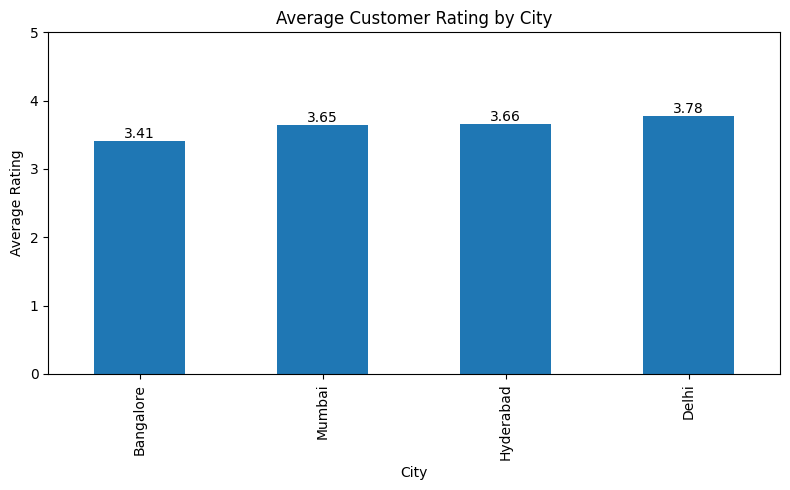

In [135]:
import matplotlib.pyplot as plt
import os

os.makedirs("outputs", exist_ok=True)

plt.figure(figsize=(8, 5))

ax = city_ratings.plot(kind='bar')

plt.title("Average Customer Rating by City")
plt.xlabel("City")
plt.ylabel("Average Rating")

for i, v in enumerate(city_ratings):
    ax.text(i, v, f"{v:.2f}", ha='center', va='bottom')

plt.ylim(0, 5)
plt.tight_layout()

plt.savefig("outputs/avg_rating_by_city.png",
            dpi=300,
            bbox_inches="tight")

plt.show()


**Objective:
Understand revenue contribution by booking platform to identify key distribution channels and dependency risks.**

In [131]:
revenue_by_platform = df_bookings_all.groupby('booking_platform')['revenue_realized'].sum()

In [132]:
labels = revenue_by_platform.index
values = revenue_by_platform.values

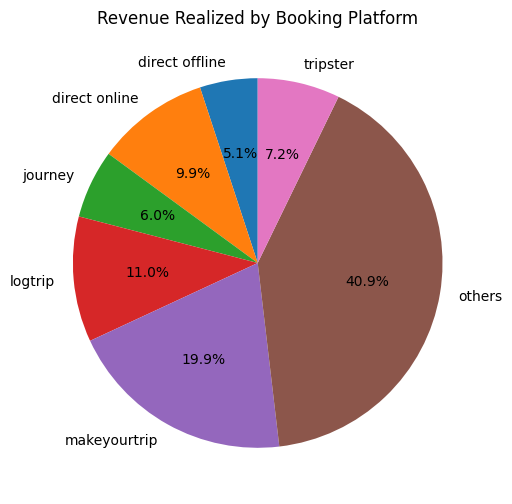

In [167]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Revenue Realized by Booking Platform')

plt.savefig("outputs/revenue_by_booking_pf.png",
            dpi=300,
            bbox_inches="tight")
plt.show()

**Objective: Assess Whether Revenue Differences Across Cities Are Pricing-Driven or Demand-Driven**

In [153]:
revenue_realized = df_bookings_all.groupby(['property_id','property_name_x','city_x'])['revenue_realized'].sum().reset_index()

In [154]:
successful_bookings = df.groupby(['property_id','property_name','city'])['successful_bookings'].sum().reset_index()

In [155]:
revenue_realized_bookings = pd.merge(
    revenue_realized,
    successful_bookings[['property_id','successful_bookings']],
    on='property_id',
    how='inner'
)

In [156]:
revenue_realized_bookings['ADR'] = (
    revenue_realized_bookings['revenue_realized'] /
    revenue_realized_bookings['successful_bookings']
)

In [157]:
adr_occ = pd.merge(
    revenue_realized_bookings,
    property_util[['property_id', 'occ_pct', 'capacity']],
    on='property_id',
    how='inner'
)

adr_occ = adr_occ.rename(columns={'city_x': 'city'})



In [159]:
city_summary = (
    adr_occ
    .groupby('city')
    .agg({
        'revenue_realized': 'sum',
        'successful_bookings': 'sum',
        'occ_pct': 'mean',
        'capacity': 'mean'
    })
    .reset_index()
)

# Correct ADR calculation
city_summary['ADR'] = (
    city_summary['revenue_realized'] /
    city_summary['successful_bookings']
)
city_summary = city_summary[['city','ADR','occ_pct','revenue_realized','successful_bookings']]
city_summary


,city,ADR,occ_pct,revenue_realized,successful_bookings
0,Bangalore,13153.016176,56.330551,420383550,31961
1,Delhi,12167.988758,61.509942,294404488,24195
2,Hyderabad,9323.603234,58.118318,325179310,34877
3,Mumbai,15389.927973,57.907821,668569251,43442


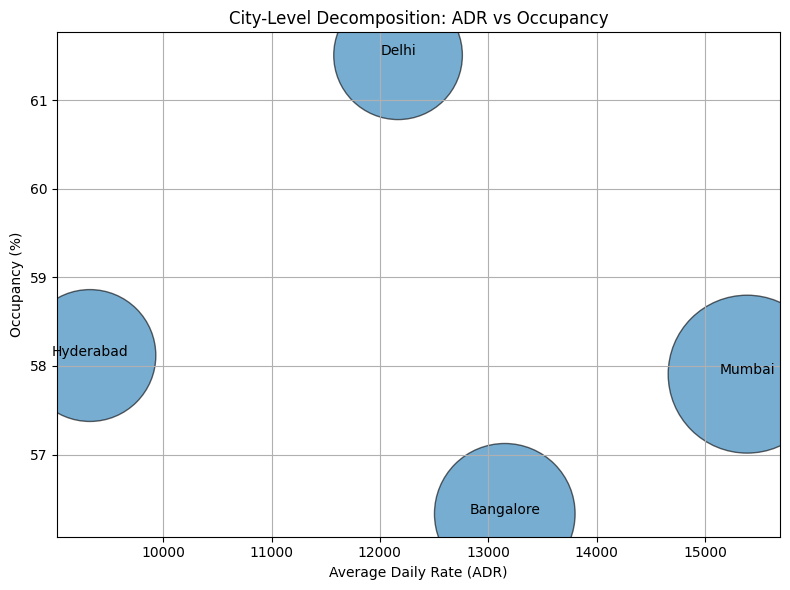

In [168]:
# Create scaled size column
import numpy as np

city_summary['bubble_size'] = np.sqrt(city_summary['revenue_realized']) * 0.5

plt.figure(figsize=(8,6))

scatter = plt.scatter(
    city_summary['ADR'],
    city_summary['occ_pct'],
    s=city_summary['bubble_size'],
    alpha=0.6,edgecolors='black', linewidth=1
)

# Add city labels manually
for i in range(len(city_summary)):
    plt.text(
        city_summary['ADR'][i],
        city_summary['occ_pct'][i],
        city_summary['city'][i],
        fontsize=10,
        ha='center'
    )
plt.title("City-Level Decomposition: ADR vs Occupancy")
plt.xlabel("Average Daily Rate (ADR)")
plt.ylabel("Occupancy (%)")
plt.grid(True)
plt.tight_layout()

plt.savefig("outputs/adr_vs_occ_by_city.png",
            dpi=300,
            bbox_inches="tight")
plt.show()



**Key Insights**

**1️⃣ Revenue Performance is Primarily ADR-Driven, Not Occupancy-Driven**

City-level decomposition shows that revenue variation aligns more closely with ADR than occupancy levels.

Mumbai generates the highest revenue despite not having the highest occupancy, driven by the highest ADR.

Delhi records the highest occupancy but comparatively lower revenue, indicating under-monetization of demand.

This confirms pricing strategy plays a stronger role than demand variation in driving revenue differences across cities.

**2️⃣ Weekday Demand Underperformance is Structural Across All Cities**

Weekend occupancy consistently outperforms weekday occupancy in every city.
This indicates a portfolio-wide weekday demand gap rather than a city-specific issue.

**3️⃣ Bangalore Shows Demand Weakness Despite Strong Pricing**

Bangalore has relatively high ADR but the lowest occupancy among major cities.
Revenue remains strong due to pricing power, but utilization remains suboptimal.

**4️⃣ Delhi Has Pricing Upside Opportunity**

Delhi exhibits the highest occupancy levels but moderate ADR compared to Mumbai and Bangalore.
Strong demand signals room for controlled ADR optimization.

**5️⃣ High-Capacity Properties with Lower Utilization Represent Asset Efficiency Gaps**

Property-level analysis reveals certain high-capacity properties operating at lower occupancy levels, indicating under-leveraged fixed assets.

**6️⃣ Luxury Segment Drives Revenue Contribution**

Luxury properties contribute significantly higher realized revenue than Business properties.
However, this appears pricing-driven rather than purely demand-driven.

**7️⃣ Customer Ratings Show Moderate Correlation with Occupancy**

Cities with relatively stronger ratings tend to maintain healthier occupancy levels, indicating service quality impacts demand performance.

**Business Recommendations**
**1. Optimize Pricing in High-Demand Markets (Delhi Focus)**

Implement controlled ADR increases in Delhi through:

Segmented pricing experiments

Premium room upselling

Event-driven pricing adjustments

Goal: Capture incremental revenue without materially impacting occupancy.

**2. Stimulate Demand in Bangalore (Demand-Side Intervention)**

Focus on:

Corporate weekday tie-ups

Targeted local marketing campaigns

Mid-week bundled packages

Goal: Improve occupancy while maintaining pricing strength.

**3. Address Portfolio-Wide Weekday Gap**

Introduce:

Long-stay weekday discounts

Business travel partnerships

Dynamic pricing for midweek stays

Goal: Improve asset utilization during structurally weaker periods.

**4. Improve Utilization of High-Capacity Properties**

Conduct:

Property-level performance audits

Event/conference sales initiatives

Local partnership strategies

Goal: Improve return on fixed capacity assets.

**5. Maintain Premium Positioning in Mumbai**

Avoid aggressive discounting.
Leverage strong pricing power while preserving occupancy stability.

**6. Strengthen Service Consistency in Lower-Rated Locations**

Use rating insights to:

Identify operational improvement areas

Implement targeted service quality programs

Goal: Improve occupancy through experience-driven demand.

**Business Impact**

*If implemented strategically:*

*Revenue growth can be achieved through targeted ADR optimization rather than blanket discounting.*

*Weekday utilization improvements can enhance asset productivity without expansion.*

*Demand-side interventions in specific cities can balance portfolio performance.*

*Pricing and operational strategies become data-driven rather than intuition-based.*